Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None,'display.max_rows',500, 'display.max_colwidth', 1500, 'display.float_format',  '{:,.2f}'.format)
# Set Style
sns.set(style='ticks',palette=sns.color_palette('Set2'))
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


2022-10-16 22:37:10.001071: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-16 22:37:10.003577: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-16 22:37:10.003586: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("./Data/Train")
data_dir_test = pathlib.Path('./Data/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  batch_size=batch_size,
  image_size=(img_height, img_width),
  seed=123,
  validation_split=0.2,
  subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


2022-10-16 22:37:11.696189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-16 22:37:11.697625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-16 22:37:11.697658: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-16 22:37:11.697681: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-16 22:37:11.697702: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  batch_size=batch_size,
  image_size=(img_height, img_width),
  seed=123,
  validation_split=0.2,
  subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
score_metrics = pd.DataFrame()

In [9]:
def get_metrics(model, title ):
    scores = []
    loss, accuracy =  model.evaluate(train_ds, verbose=1,)
    loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)
    scores.append((title, accuracy, accuracy_v, loss, loss_v))
    sample_metrics = pd.DataFrame(scores,columns=['Model', 
                                            'Training  Accuracy',
                                            'Validation Accuracy',
                                            'Training Loss',
                                            'Validation Loss'] )
    return sample_metrics


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

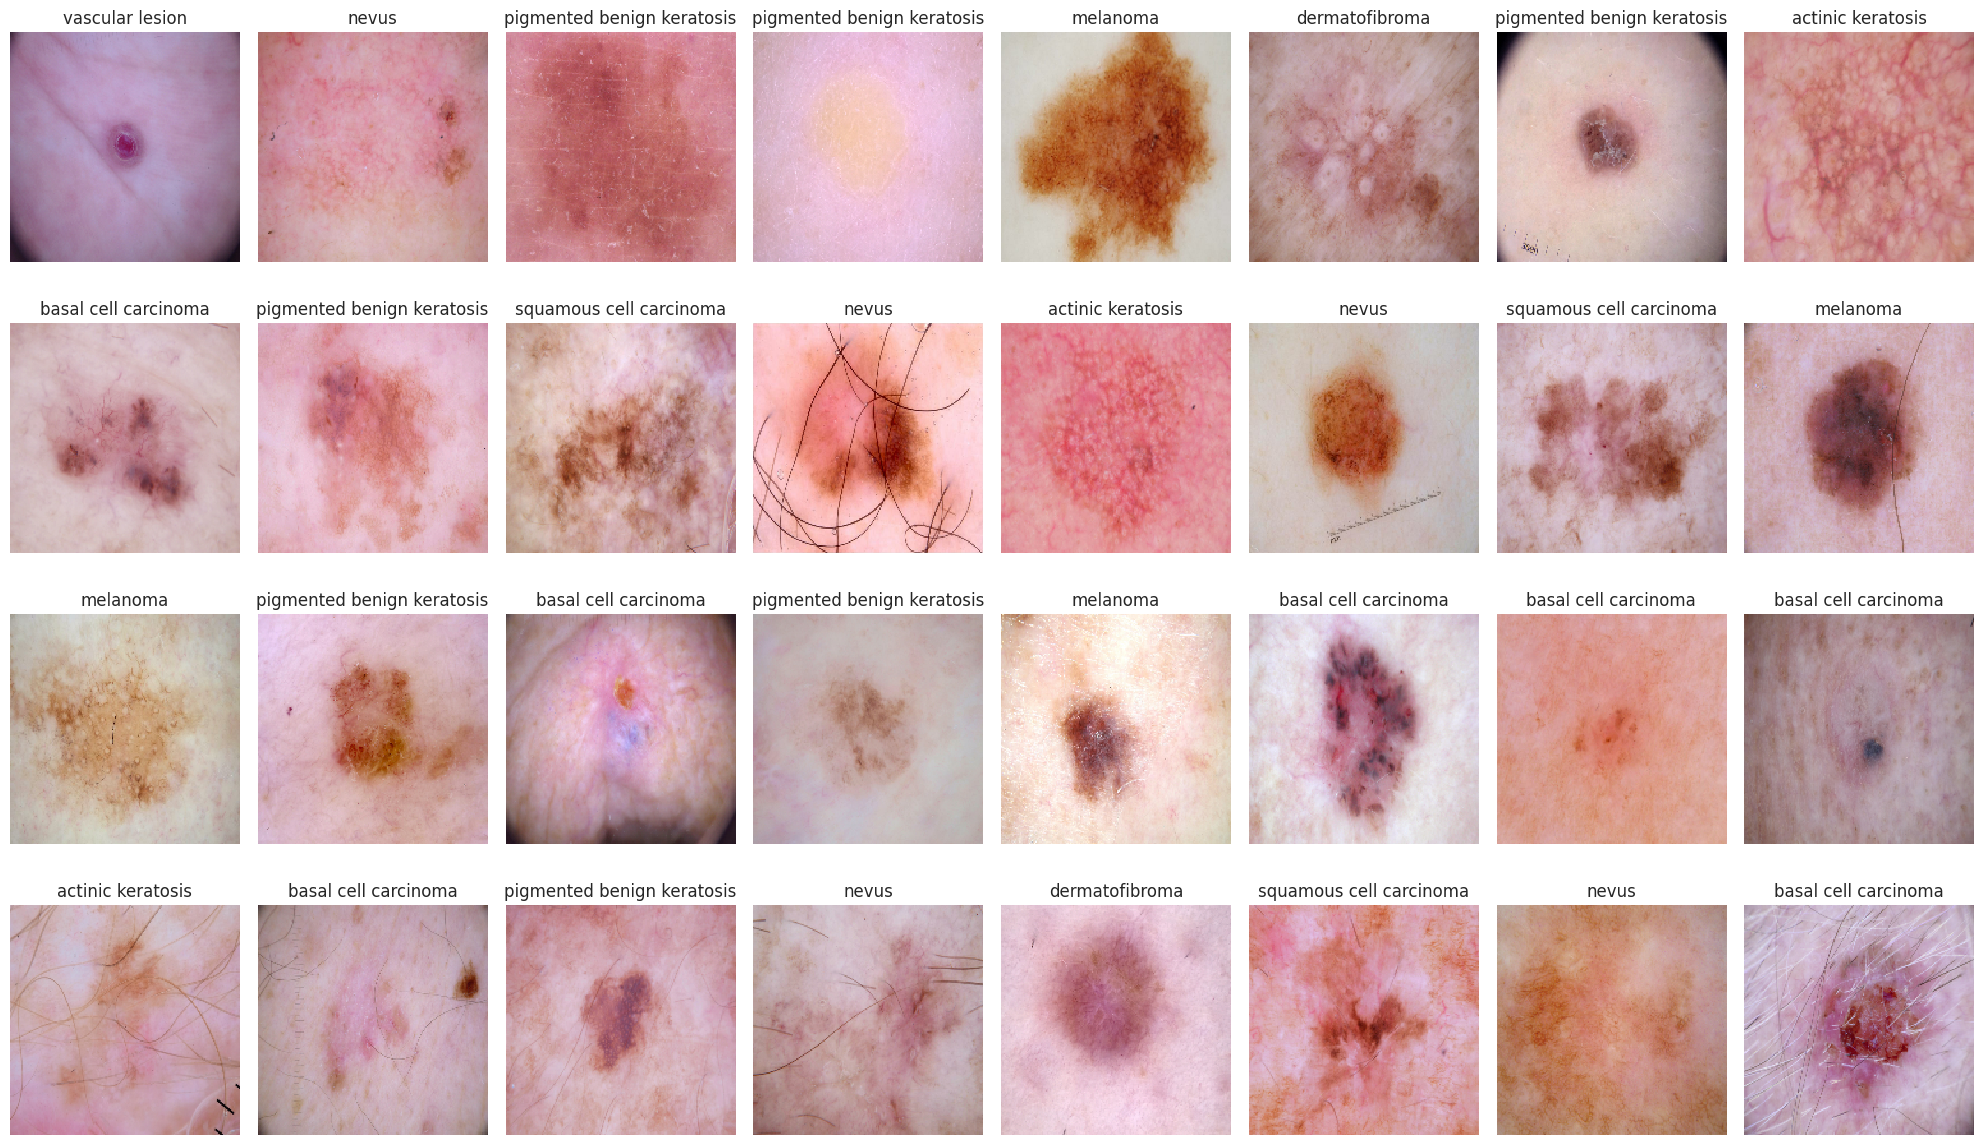

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(20,12))

for images, labels in train_ds.take(1):
   for i in range(32):
    ax = plt.subplot(4, 8, i+1)
    plt.title(class_names[labels[i]])
    plt.imshow(images[i].numpy().astype("uint8"), interpolation='nearest')
    plt.axis("off")
plt.tight_layout()
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

Model 1 

In [13]:
### Your code goes here
num_classes = 9
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,  activation = "softmax")   
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

+ Adam is the best optimizers for image classification. If one wants to train the neural network in less time and more efficiently than Adam is the optimizer.
+ Sparse Cross-entropy loss function is best for multiclass classification.

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 89ms/step - loss: 1.9665 - accuracy: 0.2801 - val_loss: 1.7306 - val_accuracy: 0.3579
Epoch 2/20
56/56 [==============================] - 5s 83ms/step - loss: 1.7292 - accuracy: 0.3811 - val_loss: 1.6887 - val_accuracy: 0.3781
Epoch 3/20
56/56 [==============================] - 5s 81ms/step - loss: 1.6050 - accuracy: 0.4146 - val_loss: 1.4885 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 5s 82ms/step - loss: 1.4185 - accuracy: 0.5061 - val_loss: 1.4597 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 5s 86ms/step - loss: 1.3494 - accuracy: 0.5324 - val_loss: 1.4133 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 5s 85ms/step - loss: 1.2593 - accuracy: 0.5636 - val_loss: 1.4595 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 5s 83ms/step - loss: 1.1932 - accuracy: 0.5770 - val_loss: 1.3843 - val_accuracy: 0.5213
Epoch 8/20
56

In [17]:
score_metrics = score_metrics.append(get_metrics(model, 'CNN Model'))
score_metrics

14/14 [==============================] - 0s 23ms/step - loss: 1.8824 - accuracy: 0.5101


Model  Training  Accuracy  Validation Accuracy  Training Loss  \
0  CNN Model                0.85                 0.51           0.41   

   Validation Loss  
0             1.88

### Visualizing training results

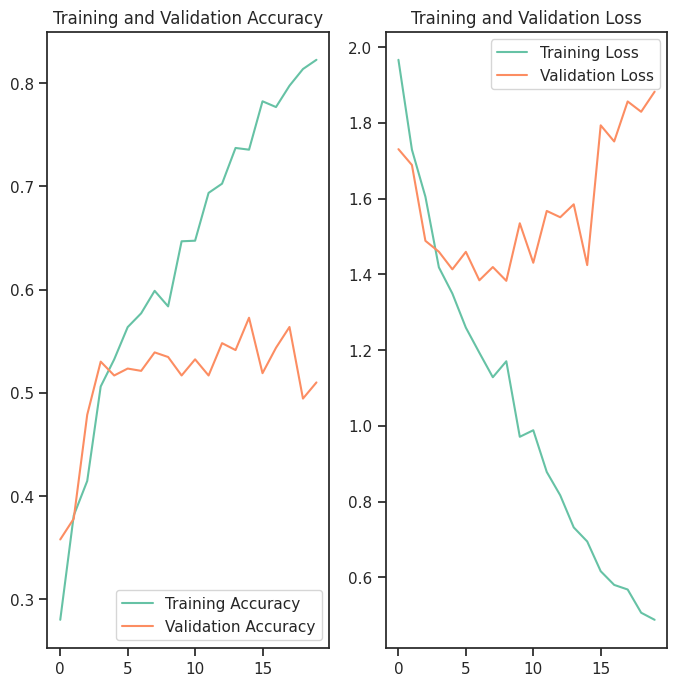

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

#### Observations
+ Training v/s Validation Accuracy Plots 
  + The training accuracy is increasing linearly over time till ~85% 
  + Validation Accuray peaks till ~51%
  + The difference between training and validation accuracy is noticable. Its cleary an overfitting scenario.
+ Traning v/s Validation Loss Plots
  + Similiar scenario is visible there is huge gap in Training v/s Validation Loss. Its implies that model is Overfitting  

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                  input_shape=(img_height,
                                                               img_width,
                                                               3)),
     layers.experimental.preprocessing.RandomRotation(0.38),
     layers.experimental.preprocessing.RandomZoom(0.5),
     layers.experimental.preprocessing.RandomContrast(0.4),
     layers.experimental.preprocessing.RandomCrop(img_height, img_width),
     layers.experimental.preprocessing.RandomTranslation(1,0.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    ]
)

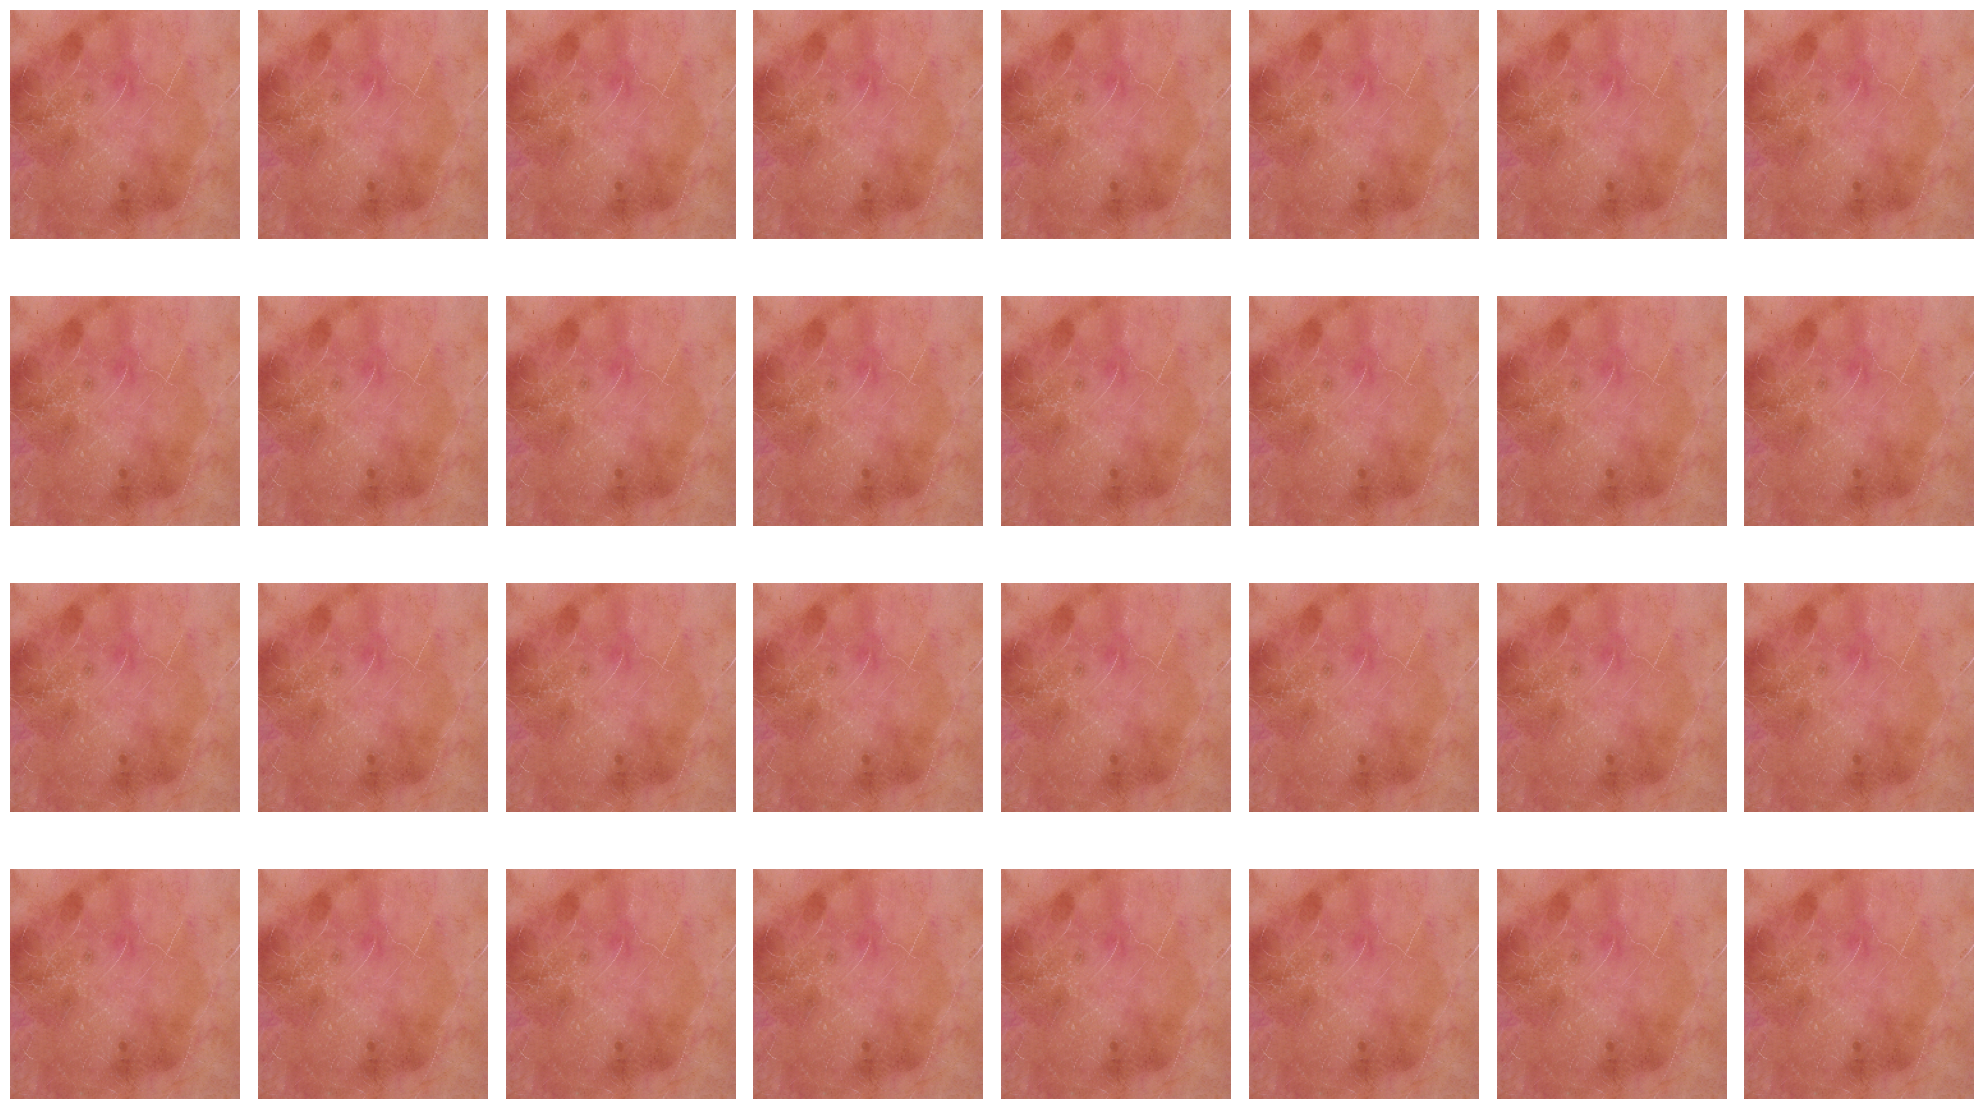

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(20,12))
for images, _ in train_ds.take(1):  
  for i in range(32):
    ax = plt.subplot(4, 8, i+1)
    augmented_images = data_augmentation(images)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
plt.tight_layout()
plt.show()

### Todo:
### Create the model, compile and train the model


Model 2 with data augmention



In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

num_classes = 9
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1.0/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = "softmax")
])

### Compiling the model

In [22]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [24]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 113ms/step - loss: 2.0603 - accuracy: 0.2048 - val_loss: 2.0376 - val_accuracy: 0.3043
Epoch 2/20
56/56 [==============================] - 7s 117ms/step - loss: 1.9888 - accuracy: 0.2612 - val_loss: 1.8710 - val_accuracy: 0.3378
Epoch 3/20
56/56 [==============================] - 6s 112ms/step - loss: 1.8197 - accuracy: 0.3237 - val_loss: 1.7232 - val_accuracy: 0.3512
Epoch 4/20
56/56 [==============================] - 6s 113ms/step - loss: 1.7118 - accuracy: 0.3365 - val_loss: 1.9457 - val_accuracy: 0.2864
Epoch 5/20
56/56 [==============================] - 6s 114ms/step - loss: 1.6686 - accuracy: 0.3672 - val_loss: 1.6668 - val_accuracy: 0.3781
Epoch 6/20
56/56 [==============================] - 6s 112ms/step - loss: 1.6605 - accuracy: 0.3672 - val_loss: 1.6456 - val_accuracy: 0.3870
Epoch 7/20
56/56 [==============================] - 7s 121ms/step - loss: 1.6351 - accuracy: 0.3923 - val_loss: 1.5657 - val_accuracy: 0.4139
Epoch 

In [25]:
score_metrics = score_metrics.append(get_metrics(model, 'Model - Augumentation'))
score_metrics

14/14 [==============================] - 0s 28ms/step - loss: 1.5228 - accuracy: 0.4609


Model  Training  Accuracy  Validation Accuracy  \
0              CNN Model                0.85                 0.51   
0  Model - Augumentation                0.48                 0.46   

   Training Loss  Validation Loss  
0           0.41             1.88  
0           1.45             1.52

### Visualizing the results

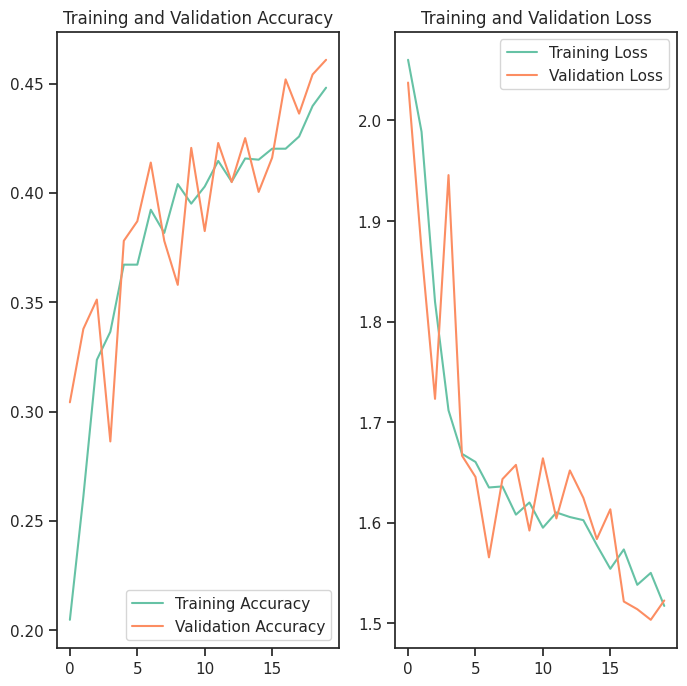

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Observations
+ The pattern is quite similar and visible in both plots
+ The Training & Validation Accuracy is reduced to ~48% and Gap between two is minimum
+ The Training & Validation Loss is increased to arround ~1.4%
+ There is some gain in using augmentation the overfitting is controlled but now model tends to underfit 
+ Howere Class Imbalance has to be treated to improve the accuracy 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [27]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)


2239

In [28]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

Path  \
0        Data/Train/squamous cell carcinoma/ISIC_0032014.jpg   
1        Data/Train/squamous cell carcinoma/ISIC_0031286.jpg   
2        Data/Train/squamous cell carcinoma/ISIC_0027303.jpg   
3        Data/Train/squamous cell carcinoma/ISIC_0030280.jpg   
4        Data/Train/squamous cell carcinoma/ISIC_0028816.jpg   
...                                                      ...   
2234  Data/Train/pigmented benign keratosis/ISIC_0028560.jpg   
2235  Data/Train/pigmented benign keratosis/ISIC_0028223.jpg   
2236  Data/Train/pigmented benign keratosis/ISIC_0025157.jpg   
2237  Data/Train/pigmented benign keratosis/ISIC_0025519.jpg   
2238  Data/Train/pigmented benign keratosis/ISIC_0024880.jpg   

                           Label  
0        squamous cell carcinoma  
1        squamous cell carcinoma  
2        squamous cell carcinoma  
3        squamous cell carcinoma  
4        squamous cell carcinoma  
...                          ...  
2234  pigmented benign keratosis  
2235  pigmented benign keratosis  
2236  pigmented benign keratosis  
2237  pigmented benign keratosis  
2238  pigmented benign keratosis  

[2239 rows x 2 columns]

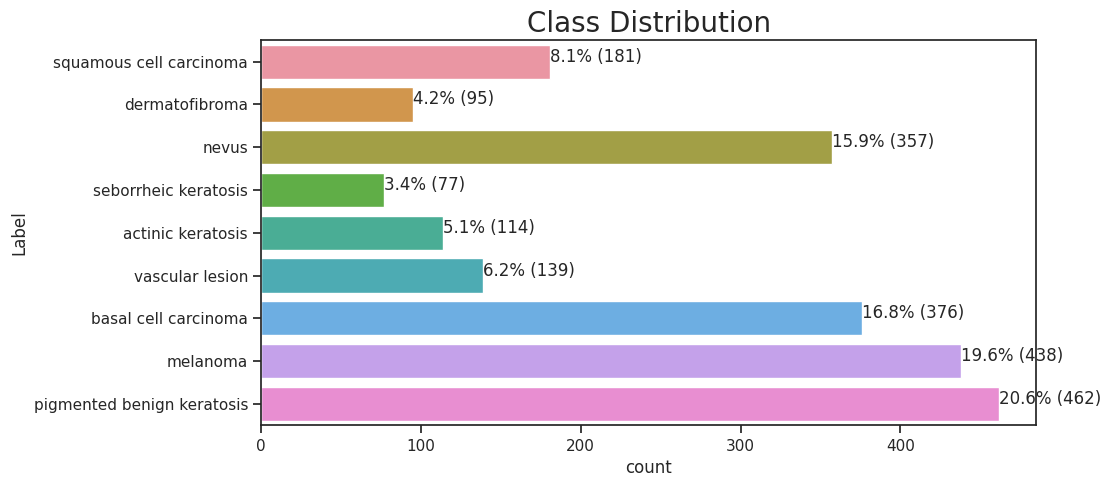

In [29]:
plt.figure(figsize=(10,5))
plt.title('Class Distribution', fontsize=20)
total = float(len(original_df))
ax = sns.countplot(y=original_df['Label'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total) 
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() /2
    ax.annotate('{0} ({1})'.format(percentage,p.get_width()), (x, y))
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
Seborrheic keratosis has the least number of samples 77 samples
#### - Which classes dominate the data in terms proportionate number of samples?
Pigmented benign keratosis, melanoma, basal cell carcinoma and nevus are dominating the data with higher number of samples. Pigmented benign keratosis has 20.6% percentage with 462 samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [30]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [31]:
path_to_training_dataset="./Data/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to ./Data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F46EC3BAFB0>: 100%|██████████| 500/500 [00:00<00:00, 508.88 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to ./Data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F46EC3EB490>: 100%|██████████| 500/500 [00:01<00:00, 482.95 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to ./Data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F46EC337DF0>: 100%|██████████| 500/500 [00:01<00:00, 452.51 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to ./Data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F46EC3BA170>: 100%|██████████| 500/500 [00:03<00:00, 128.17 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to ./Data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F46EC307640>: 100%|██████████| 500/500 [00:03<00:00, 155.45 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to ./Data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F46EC233250>: 100%|██████████| 500/500 [00:01<00:00, 446.75 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to ./Data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F46F4B0A470>: 100%|██████████| 500/500 [00:01<00:00, 279.06 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to ./Data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F46EC3A4850>: 100%|██████████| 500/500 [00:01<00:00, 461.95 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to ./Data/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F46F4B09F60>: 100%|██████████| 500/500 [00:01<00:00, 470.57 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [32]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [33]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031012.jpg_7b9d186d-ac69-4d19-9b4a-dc2c2da7022f.jpg',
 'Data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0026132.jpg_47588f79-4790-4f46-900e-4cef742a3b6e.jpg',
 'Data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0025350.jpg_d880752d-9038-450a-b331-b5995c7ae3f2.jpg',
 'Data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027719.jpg_eaa4d116-5fe1-40d6-9f7b-ab9d165e720d.jpg',
 'Data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027303.jpg_e21a4c1e-3857-4c43-868e-f970d37bb371.jpg',
 'Data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0029268.jpg_8f3a0b73-284a-4560-82b9-fc16e1510681.jpg',
 'Data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031940.jpg_803fed32-61cc-427d-8c04-6ac68356f829.jpg',
 'Data/Train/squamous cell carcinoma/outp

In [34]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [35]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [36]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [37]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [38]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [39]:
data_dir_train= pathlib.Path("./Data/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [40]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

+ _layers.experimental.preprocessing.Rescaling_ will be used for normalization data between (0,1) in RGB range [0,255].

+ Dropout is added a form of regularization to handle overfitting.

In [41]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 9
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1.0/255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),
  layers.Dense(num_classes, activation = "softmax")
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [42]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [43]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 25s 134ms/step - loss: 1.4992 - accuracy: 0.4724 - val_loss: 3.9947 - val_accuracy: 0.1210
Epoch 2/30
169/169 [==============================] - 22s 130ms/step - loss: 0.9536 - accuracy: 0.6728 - val_loss: 3.3821 - val_accuracy: 0.1344
Epoch 3/30
169/169 [==============================] - 22s 131ms/step - loss: 0.6903 - accuracy: 0.7656 - val_loss: 2.0379 - val_accuracy: 0.4276
Epoch 4/30
169/169 [==============================] - 22s 130ms/step - loss: 0.4982 - accuracy: 0.8301 - val_loss: 1.0584 - val_accuracy: 0.6333
Epoch 5/30
169/169 [==============================] - 22s 130ms/step - loss: 0.3514 - accuracy: 0.8856 - val_loss: 0.6586 - val_accuracy: 0.7899
Epoch 6/30
169/169 [==============================] - 22s 129ms/step - loss: 0.2791 - accuracy: 0.9063 - val_loss: 2.3021 - val_accuracy: 0.4165
Epoch 7/30
169/169 [==============================] - 22s 133ms/step - loss: 0.2076 - accuracy: 0.9325 - val_loss: 0.5017 - val_ac

In [44]:
score_metrics = score_metrics.append(get_metrics(model, 'Model - Class Balanced'))
score_metrics

43/43 [==============================] - 2s 36ms/step - loss: 0.7309 - accuracy: 0.8033


Model  Training  Accuracy  Validation Accuracy  \
0               CNN Model                0.85                 0.51   
0   Model - Augumentation                0.48                 0.46   
0  Model - Class Balanced                0.92                 0.80   

   Training Loss  Validation Loss  
0           0.41             1.88  
0           1.45             1.52  
0           0.20             0.73

#### **Todo:**  Visualize the model results

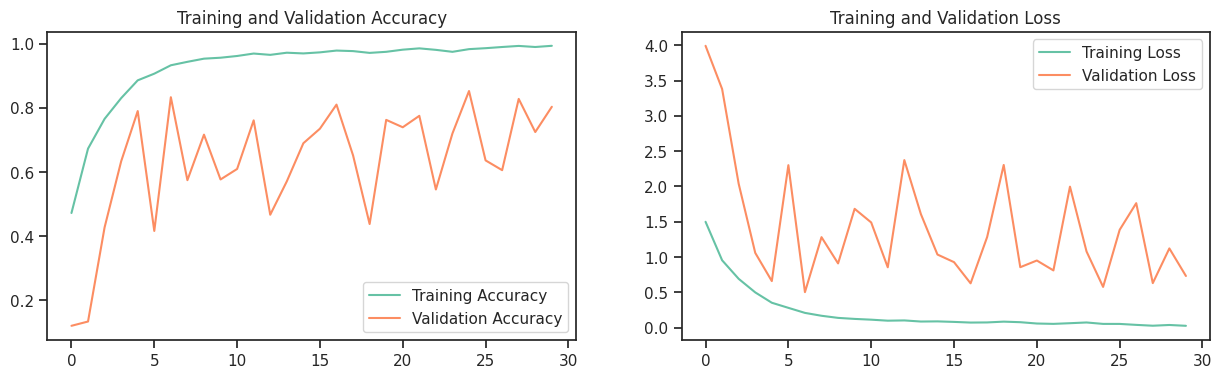

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Observations
+ Class Balancing with Augmentor has helped in improving model performance.
+ Augmentation also helped to control the initial overfitting issue.
+ Training v/s Validation Accuracy has increased steadily. 
+ Training Accuracy 96% And Validation Accuracy 80% achieved.

In [46]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  labels='inferred',
  label_mode='int',
  batch_size=32,
  class_names=None,
  color_mode='rgb',
  image_size=(img_height, img_width),
  seed=123,
  shuffle=False,
  interpolation='bilinear',
  follow_links=False)

Found 118 files belonging to 9 classes.


In [52]:
img_path = './Data/Test/melanoma/ISIC_0000029.jpg'
img = keras.preprocessing.image.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print('Predictions:- ',predictions)

score = tf.nn.relu(predictions[0])
print('Score:- ',score)

print("This image most likely belongs to {} with a {:.2f} prediction score."
    .format(class_names[np.argmax(score)], np.max(score))
)

1/1 [==============================] - 0s 14ms/step
Predictions:-  [[4.1451791e-08 6.1477753e-11 4.6481543e-09 9.9793708e-01 2.0424644e-03
  1.8116936e-05 2.2478584e-06 3.2716162e-08 1.6302529e-07]]
Score:-  tf.Tensor(
[4.1451791e-08 6.1477753e-11 4.6481543e-09 9.9793708e-01 2.0424644e-03
 1.8116936e-05 2.2478584e-06 3.2716162e-08 1.6302529e-07], shape=(9,), dtype=float32)
This image most likely belongs to melanoma with a 1.00 prediction score.
